## installs

In [1]:
!pip install numpy pandas matplotlib seaborn

## Handling imports

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

## Start of code

In [6]:
accidents_df = pd.read_csv("US_Accidents_March23_sampled_500k.csv")

In [7]:
accidents_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [8]:
accidents_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Dropping unusable columns for problem

In [9]:
accidents_df.columns = accidents_df.columns.str.lower()

In [10]:
accidents_df.head()

,id,source,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),...,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,sunrise_sunset,civil_twilight,nautical_twilight,astronomical_twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [11]:
accidents_df.isna().sum()

id                            0
source                        0
severity                      0
start_time                    0
end_time                      0
start_lat                     0
start_lng                     0
end_lat                  220377
end_lng                  220377
distance(mi)                  0
description                   1
street                      691
city                         19
county                        0
state                         0
zipcode                     116
country                       0
timezone                    507
airport_code               1446
weather_timestamp          7674
temperature(f)            10466
wind_chill(f)            129017
humidity(%)               11130
pressure(in)               8928
visibility(mi)            11291
wind_direction            11197
wind_speed(mph)           36987
precipitation(in)        142616
weather_condition         11101
amenity                       0
bump                          0
crossing

In [12]:
columns_to_keep = ['severity' , 'start_time' , 'city' , 'state' , 'visibility(mi)' , 'precipitation(in)' , 'weather_condition']

In [13]:
accidents_subset = accidents_df[columns_to_keep]

In [14]:
accidents_subset.shape

(500000, 7)

In [15]:
accidents_subset.head()


,severity,start_time,city,state,visibility(mi),precipitation(in),weather_condition
0,2,2019-06-12 10:10:56,Zachary,LA,10.0,0.0,Fair
1,2,2022-12-03 23:37:14.000000000,Sterling,VA,10.0,0.0,Fair
2,2,2022-08-20 13:13:00.000000000,Lompoc,CA,10.0,0.0,Fair
3,2,2022-02-21 17:43:04,Austin,MN,10.0,0.0,Wintry Mix
4,2,2020-12-04 01:46:00,Bakersfield,CA,10.0,0.0,Fair


In [16]:
accidents_subset.isna().sum()

severity                  0
start_time                0
city                     19
state                     0
visibility(mi)        11291
precipitation(in)    142616
weather_condition     11101
dtype: int64

In [17]:
accidents_subset['weather_condition'].unique()

array(['Fair', 'Wintry Mix', 'Light Rain', 'Cloudy', 'Mostly Cloudy',
       'Partly Cloudy', 'Clear', 'Scattered Clouds', 'Fog', 'Overcast',
       'Light Snow', 'T-Storm', nan, 'Thunderstorms and Rain', 'Thunder',
       'Light Rain with Thunder', 'Rain', 'Showers in the Vicinity',
       'Mostly Cloudy / Windy', 'Heavy Rain', 'Cloudy / Windy',
       'Light Drizzle', 'Heavy T-Storm', 'Light Rain / Windy', 'Smoke',
       'Haze', 'Blowing Dust / Windy', 'N/A Precipitation',
       'Thunder in the Vicinity', 'Snow', 'Heavy Thunderstorms and Rain',
       'Shallow Fog', 'Light Freezing Drizzle', 'Fair / Windy',
       'Patches of Fog', 'Light Snow / Windy', 'Blowing Snow / Windy',
       'Thunderstorm', 'Drizzle', 'T-Storm / Windy',
       'Partly Cloudy / Windy', 'Heavy Rain / Windy',
       'Heavy Snow / Windy', 'Mist', 'Light Thunderstorms and Rain',
       'Rain / Windy', 'Light Freezing Rain', 'Heavy Snow',
       'Light Ice Pellets', 'Heavy T-Storm / Windy', 'Heavy Drizzle',
    

In [18]:
accidents_subset['precipitation(in)'].unique()

array([0.000e+00,       nan, 9.000e-02, 7.000e-02, 1.800e-01, 1.100e-01,
       2.000e-02, 1.000e-02, 4.000e-02, 2.800e-01, 1.360e+00, 1.300e-01,
       1.000e-01, 5.000e-02, 3.000e-02, 8.000e-02, 8.200e-01, 1.500e-01,
       5.800e-01, 1.700e-01, 1.200e-01, 2.200e-01, 2.900e-01, 2.400e-01,
       4.500e-01, 5.200e-01, 9.700e-01, 6.000e-02, 4.100e-01, 1.400e-01,
       8.800e-01, 1.900e-01, 3.800e-01, 1.600e-01, 3.600e-01, 2.000e-01,
       3.900e-01, 2.500e-01, 3.200e-01, 2.600e-01, 3.400e-01, 7.900e-01,
       2.700e-01, 3.500e-01, 6.700e-01, 9.800e-01, 2.100e-01, 2.160e+00,
       4.300e-01, 5.900e-01, 1.110e+00, 3.100e-01, 8.500e-01, 3.000e-01,
       4.900e-01, 3.700e-01, 4.000e-01, 4.400e-01, 2.300e-01, 5.100e-01,
       7.100e-01, 6.600e-01, 5.300e-01, 5.000e-01, 9.300e-01, 3.300e-01,
       8.300e-01, 9.900e-01, 4.200e-01, 1.200e+00, 5.500e-01, 4.600e-01,
       5.700e-01, 7.500e-01, 1.560e+00, 1.280e+00, 7.600e-01, 6.400e-01,
       5.400e-01, 5.600e-01, 1.990e+00, 1.050e+00, 

In [19]:
accidents_clean = accidents_subset.dropna(how = 'all', subset = ['visibility(mi)' , 'precipitation(in)' , 'weather_condition'])

In [20]:
accidents_clean.isna().sum()

severity                  0
start_time                0
city                     18
state                     0
visibility(mi)         2487
precipitation(in)    133812
weather_condition      2297
dtype: int64

In [21]:
accidents_clean['weather_condition'].unique()

array(['Fair', 'Wintry Mix', 'Light Rain', 'Cloudy', 'Mostly Cloudy',
       'Partly Cloudy', 'Clear', 'Scattered Clouds', 'Fog', 'Overcast',
       'Light Snow', 'T-Storm', 'Thunderstorms and Rain', 'Thunder',
       'Light Rain with Thunder', 'Rain', 'Showers in the Vicinity',
       'Mostly Cloudy / Windy', nan, 'Heavy Rain', 'Cloudy / Windy',
       'Light Drizzle', 'Heavy T-Storm', 'Light Rain / Windy', 'Smoke',
       'Haze', 'Blowing Dust / Windy', 'N/A Precipitation',
       'Thunder in the Vicinity', 'Snow', 'Heavy Thunderstorms and Rain',
       'Shallow Fog', 'Light Freezing Drizzle', 'Fair / Windy',
       'Patches of Fog', 'Light Snow / Windy', 'Blowing Snow / Windy',
       'Thunderstorm', 'Drizzle', 'T-Storm / Windy',
       'Partly Cloudy / Windy', 'Heavy Rain / Windy',
       'Heavy Snow / Windy', 'Mist', 'Light Thunderstorms and Rain',
       'Rain / Windy', 'Light Freezing Rain', 'Heavy Snow',
       'Light Ice Pellets', 'Heavy T-Storm / Windy', 'Heavy Drizzle',
    

### This is strictly for seeing precipitation alone and testing stuff around it

In [22]:
null_precipitation_df = accidents_clean[accidents_clean['precipitation(in)'].isnull()]

In [23]:
null_precipitation_df['weather_condition'].unique()

array(['Clear', 'Scattered Clouds', 'Fair', 'Partly Cloudy',
       'Mostly Cloudy', 'Overcast', 'Light Snow',
       'Thunderstorms and Rain', 'Fog', 'Haze', 'Light Rain', 'Rain',
       'Cloudy', 'Shallow Fog', 'Light Freezing Drizzle', 'Fair / Windy',
       'Thunderstorm', nan, 'Drizzle', 'Mist',
       'Heavy Thunderstorms and Rain', 'Heavy Rain', 'Smoke',
       'Patches of Fog', 'Light Drizzle', 'Light Thunderstorms and Rain',
       'Snow', 'Showers in the Vicinity', 'Light Freezing Rain',
       'Light Ice Pellets', 'Haze / Windy', 'Rain / Windy',
       'Partly Cloudy / Windy', 'Light Freezing Fog', 'Light Haze',
       'Light Rain Shower', 'Heavy Snow / Windy', 'Heavy T-Storm',
       'Cloudy / Windy', 'Thunder', 'T-Storm', 'Light Rain Showers',
       'Blowing Snow', 'Rain Shower', 'Mostly Cloudy / Windy',
       'Rain Showers', 'Heavy Freezing Drizzle',
       'Light Rain with Thunder', 'Heavy Rain / Windy',
       'Thunder in the Vicinity', 'Widespread Dust', 'Heavy Drizz

### Making the precipitation values that ideally have negligable precipitation 0

In [24]:
non_precipitation_weather = accidents_clean['weather_condition'].isin(['Clear',
'Fair',
'Partly Cloudy',
'Mostly Cloudy',
'Overcast',
'Cloudy',
'Fair / Windy',
'Haze',
'Haze / Windy',
'Partly Cloudy / Windy',
'Mostly Cloudy / Windy',
'Cloudy / Windy',
'Light Freezing Fog',
'Light Haze',
'Blowing Dust',
'Smoke',
'Blowing Dust / Windy',
'Smoke / Windy',
'N/A Precipitation',
'Partial Fog',
'Mist',
'Mist / Windy',
'Volcanic Ash']

)


In [25]:
accidents_clean.isna().sum()

severity                  0
start_time                0
city                     18
state                     0
visibility(mi)         2487
precipitation(in)    133812
weather_condition      2297
dtype: int64

In [26]:
accidents_clean.loc[non_precipitation_weather , 'precipitation(in)'] = 0

In [27]:
accidents_clean.isna().sum()

severity                 0
start_time               0
city                    18
state                    0
visibility(mi)        2487
precipitation(in)    16882
weather_condition     2297
dtype: int64

In [28]:
null_precipitation_df = accidents_clean[accidents_clean['precipitation(in)'].isnull()]

In [29]:
null_precipitation_df['weather_condition'].unique()

array(['Scattered Clouds', 'Light Snow', 'Thunderstorms and Rain', 'Fog',
       'Light Rain', 'Rain', 'Shallow Fog', 'Light Freezing Drizzle',
       'Thunderstorm', nan, 'Drizzle', 'Heavy Thunderstorms and Rain',
       'Heavy Rain', 'Patches of Fog', 'Light Drizzle',
       'Light Thunderstorms and Rain', 'Snow', 'Showers in the Vicinity',
       'Light Freezing Rain', 'Light Ice Pellets', 'Rain / Windy',
       'Light Rain Shower', 'Heavy Snow / Windy', 'Heavy T-Storm',
       'Thunder', 'T-Storm', 'Light Rain Showers', 'Blowing Snow',
       'Rain Shower', 'Rain Showers', 'Heavy Freezing Drizzle',
       'Light Rain with Thunder', 'Heavy Rain / Windy',
       'Thunder in the Vicinity', 'Widespread Dust', 'Heavy Drizzle',
       'Heavy Snow', 'Light Rain / Windy', 'Light Snow Showers',
       'Light Snow / Windy', 'Light Snow Shower', 'Snow Grains',
       'Squalls', 'Light Rain Shower / Windy', 'Small Hail',
       'T-Storm / Windy', 'Ice Pellets', 'Low Drifting Snow', 'Sand'],
  

In [30]:
accidents_clean = accidents_clean.dropna(how = 'all', subset = [ 'precipitation(in)' , 'weather_condition'])

In [31]:
accidents_clean.isna().sum()

severity                 0
start_time               0
city                    17
state                    0
visibility(mi)        2487
precipitation(in)    16439
weather_condition     1854
dtype: int64

In [32]:
accidents_clean = accidents_clean.dropna(how = 'all', subset = [ 'visibility(mi)' , 'weather_condition'])

In [33]:
accidents_clean.isna().sum()

severity                 0
start_time               0
city                    17
state                    0
visibility(mi)        1309
precipitation(in)    16439
weather_condition      676
dtype: int64

In [34]:
accidents_clean = accidents_clean.dropna(how = 'all', subset = [ 'visibility(mi)' , 'precipitation(in)'])

In [35]:
accidents_clean.isna().sum()

severity                 0
start_time               0
city                    17
state                    0
visibility(mi)        1272
precipitation(in)    16402
weather_condition      676
dtype: int64

In [36]:
severity_df = accidents_clean['severity']

In [37]:
severity_df.head()

0    2
1    2
2    2
3    2
4    2
Name: severity, dtype: int64

In [38]:
severity_df.shape

(489538,)

In [39]:
severity_df.mean()

2.211805825084059

In [56]:
severity_frequency = severity_df.value_counts()

### Plotting stuff

Text(0, 0.5, 'Number of accidents')

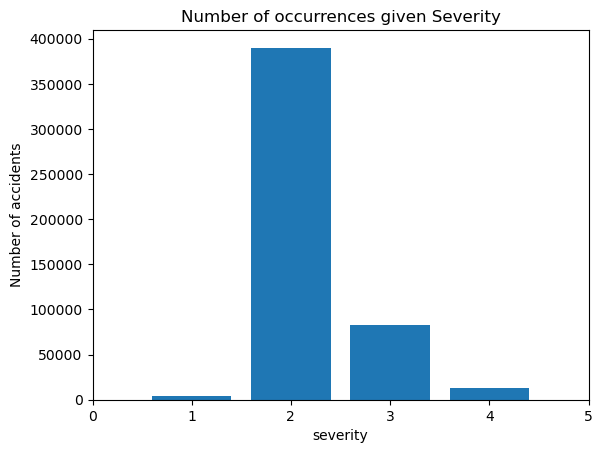

In [73]:
plt.bar(severity_frequency.index, severity_frequency.values)
plt.xlim(0, 5)
plt.title('Number of occurrences given Severity')
plt.xlabel('severity')
plt.ylabel('Number of accidents')

In [42]:
accidents_clean['precipitation(in)'].unique()

array([0.000e+00,       nan, 9.000e-02, 7.000e-02, 1.800e-01, 1.100e-01,
       2.000e-02, 1.000e-02, 4.000e-02, 1.360e+00, 1.300e-01, 1.000e-01,
       5.000e-02, 3.000e-02, 8.000e-02, 8.200e-01, 1.500e-01, 5.800e-01,
       1.700e-01, 1.200e-01, 2.200e-01, 2.900e-01, 2.400e-01, 4.500e-01,
       5.200e-01, 6.000e-02, 4.100e-01, 1.400e-01, 8.800e-01, 1.900e-01,
       3.800e-01, 1.600e-01, 3.600e-01, 2.000e-01, 3.900e-01, 2.500e-01,
       3.200e-01, 2.600e-01, 3.400e-01, 2.800e-01, 7.900e-01, 2.700e-01,
       3.500e-01, 6.700e-01, 9.800e-01, 2.100e-01, 2.160e+00, 4.300e-01,
       5.900e-01, 1.110e+00, 3.100e-01, 8.500e-01, 3.000e-01, 3.700e-01,
       4.000e-01, 4.400e-01, 7.100e-01, 6.600e-01, 2.300e-01, 5.300e-01,
       5.000e-01, 3.300e-01, 8.300e-01, 9.900e-01, 4.200e-01, 1.200e+00,
       4.600e-01, 5.700e-01, 7.500e-01, 5.100e-01, 1.560e+00, 1.280e+00,
       7.600e-01, 6.400e-01, 9.700e-01, 5.400e-01, 5.600e-01, 1.990e+00,
       1.050e+00, 1.460e+00, 4.700e-01, 7.000e-01, 

In [43]:
accidents_clean = accidents_clean.dropna(how = 'all', subset = ['precipitation(in)'])

In [44]:
accidents_clean.isna().sum()

severity                0
start_time              0
city                   17
state                   0
visibility(mi)       1272
precipitation(in)       0
weather_condition     676
dtype: int64

Text(0, 0.5, 'Precipitation(in)')

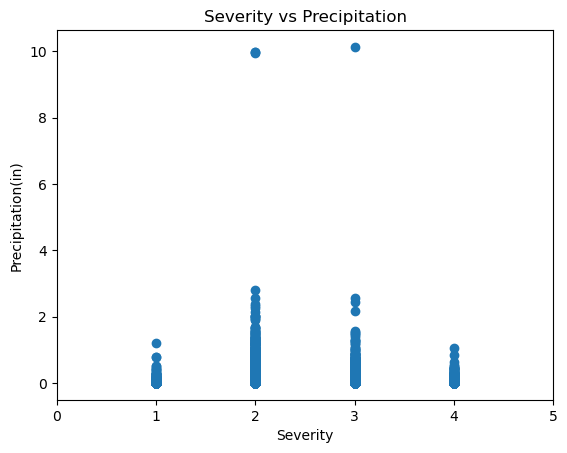

In [71]:
plt.scatter(accidents_clean['severity'], accidents_clean['precipitation(in)'])
plt.xlim(0,5)
plt.title('Severity vs Precipitation')
plt.xlabel('Severity')
plt.ylabel('Precipitation(in)')

Text(0, 0.5, 'Precipitation(in)')

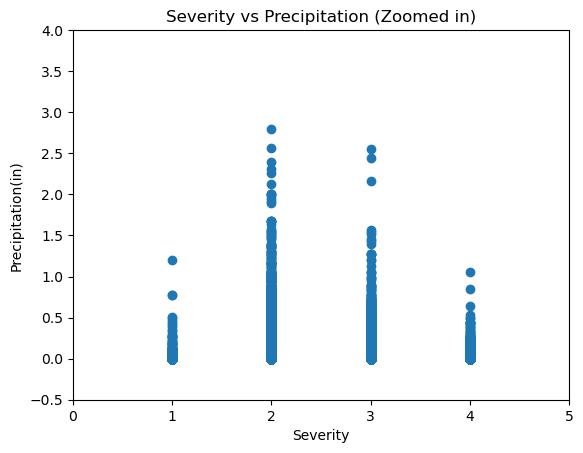

In [69]:
plt.scatter(accidents_clean['severity'], accidents_clean['precipitation(in)'])
plt.xlim(0,5)
plt.ylim(-0.5,4)
plt.title('Severity vs Precipitation (Zoomed in)')
plt.xlabel('Severity')
plt.ylabel('Precipitation(in)')

In [53]:
weather_condition_df=accidents_clean.dropna(how = 'all', subset = ['weather_condition'])

In [54]:
weather_condition_df.isna().sum()

severity                0
start_time              0
city                   17
state                   0
visibility(mi)       1272
precipitation(in)       0
weather_condition       0
dtype: int64

In [55]:
weather_condition_df = weather_condition_df['weather_condition']

In [57]:
weather_frequency = weather_condition_df.value_counts()

Text(0, 0.5, 'Number of accidents')

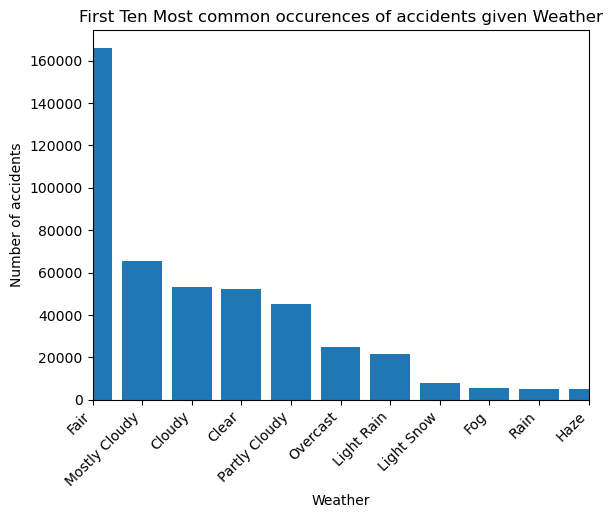

In [74]:
plt.bar(weather_frequency.index, weather_frequency.values)
plt.xlim(0, 10)
plt.xticks(rotation=45, ha='right')
plt.title('First Ten Most common occurences of accidents given Weather')
plt.xlabel('Weather')
plt.ylabel('Number of accidents')